In [1]:
import pandas as pd

file_path = 'analysis_data.csv'
data = pd.read_csv(file_path, low_memory = False)
data.head()

,locality_name,region_name,price,value_per_sqft,area,construction_status,house_type,total_rooms,total_beds,new_resale,age,Unnamed: 11
0,Tarwala Nagar,Nashik,8499000,3761,2260,Under Construction,Apartment,6,4,New,-1.0,NaN
1,Dombivali,Mumbai,6790000,13580,500,Under Construction,Apartment,4,2,New,0.0,NaN
2,Wagholi,Pune,6030000,7811,773,Under Construction,Apartment,5,3,New,-3.0,NaN
3,Ambegaon Budruk,Pune,3537000,7417,477,Ready to move,Apartment,3,1,New,0.5,NaN
4,Dombivali,Mumbai,9500000,10359,917,Under Construction,Apartment,5,3,New,-3.0,NaN


**Data Cleaning**

In [2]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=['Unnamed: 11'])

# Handle negative values in 'age' by replacing with NaN
data_cleaned['age'] = data_cleaned['age'].apply(lambda x: x if x >= 0 else None)

# Check for duplicates and drop them
duplicates_count = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()

# Summarize missing values after initial cleaning
missing_summary = data_cleaned.isnull().sum()

# Display results
duplicates_count, missing_summary, data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119475 entries, 0 to 191273
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   locality_name        119475 non-null  object 
 1   region_name          119475 non-null  object 
 2   price                119475 non-null  int64  
 3   value_per_sqft       119475 non-null  int64  
 4   area                 119475 non-null  int64  
 5   construction_status  119475 non-null  object 
 6   house_type           119475 non-null  object 
 7   total_rooms          119475 non-null  int64  
 8   total_beds           119475 non-null  int64  
 9   new_resale           119475 non-null  object 
 10  age                  94463 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 10.9+ MB


(71799,
 locality_name              0
 region_name                0
 price                      0
 value_per_sqft             0
 area                       0
 construction_status        0
 house_type                 0
 total_rooms                0
 total_beds                 0
 new_resale                 0
 age                    25012
 dtype: int64,
 None)

**Data Analysis**

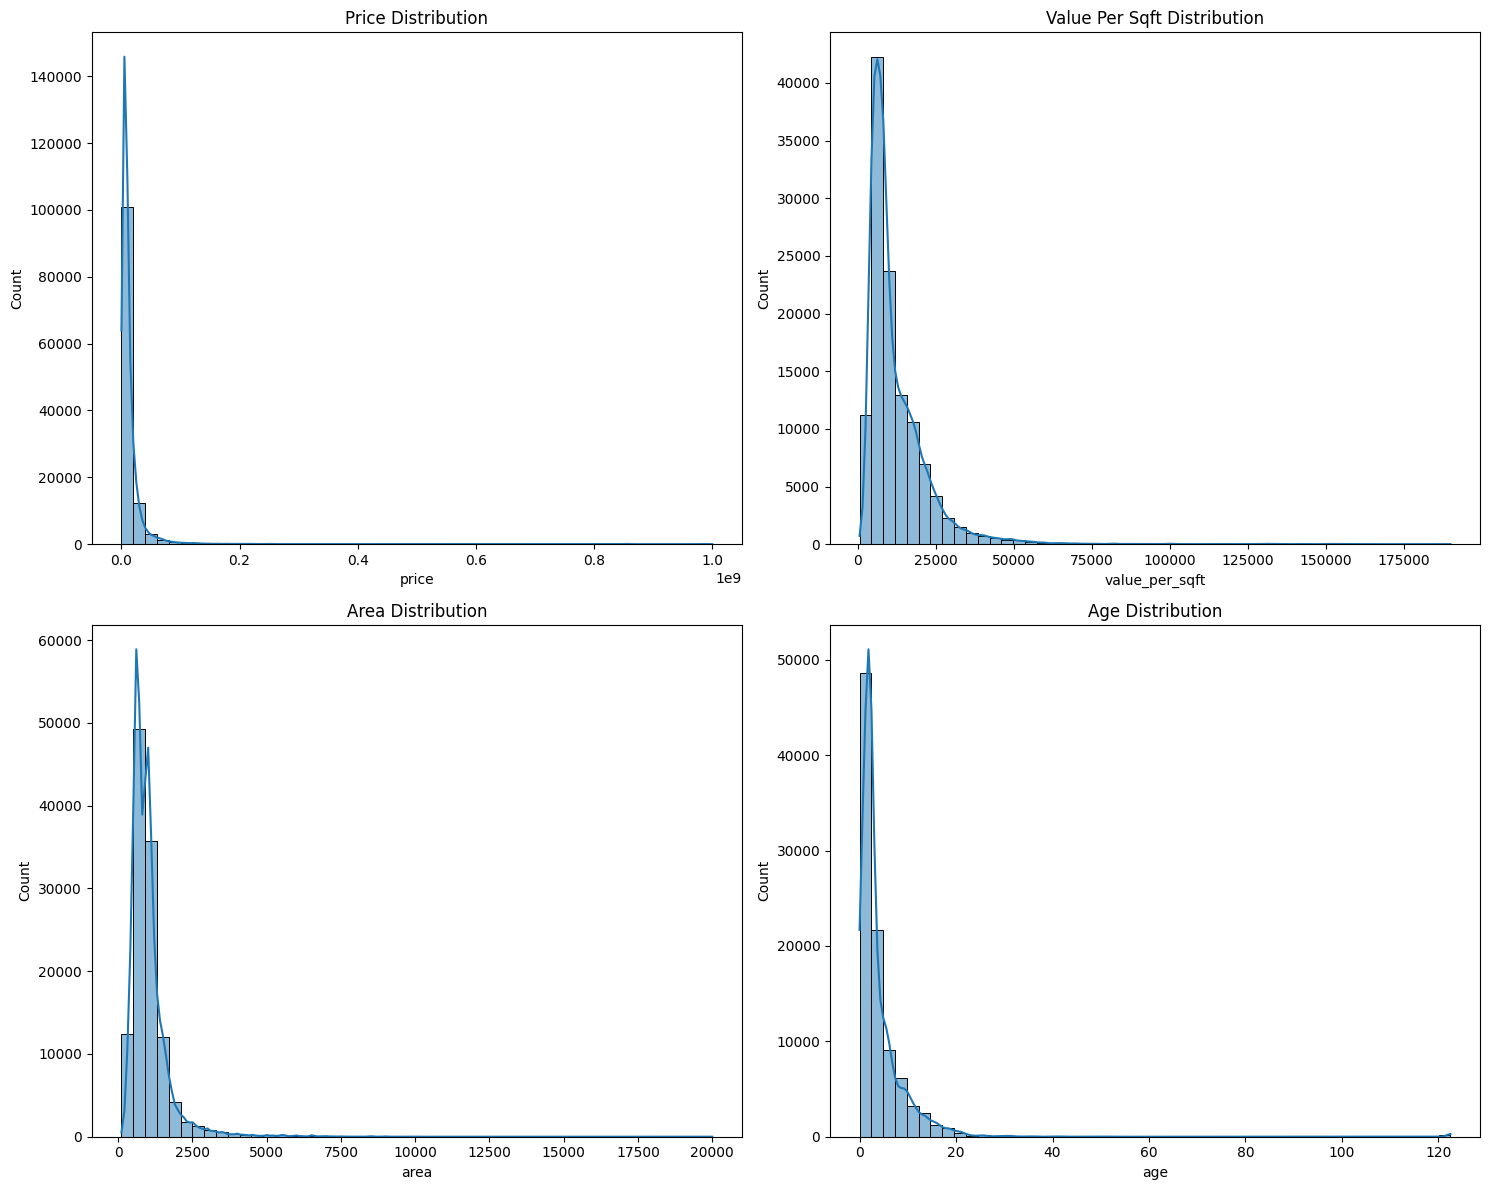

(              price  value_per_sqft           area    total_rooms  \
 count  1.194750e+05   119475.000000  119475.000000  119475.000000   
 mean   1.475035e+07    12195.859653    1026.744608       3.958234   
 std    3.622913e+07    10165.825123     705.396156       0.934850   
 min    2.200000e+05      600.000000     113.000000       2.000000   
 25%    4.800000e+06     6003.000000     640.000000       3.000000   
 50%    7.900000e+06     8807.000000     900.000000       4.000000   
 75%    1.480000e+07    15567.000000    1165.000000       4.000000   
 max    9.999000e+08   189898.000000   20000.000000      17.000000   
 
           total_beds           age  
 count  119475.000000  94463.000000  
 mean        1.958226      4.168311  
 std         0.934863      7.107782  
 min         0.000000      0.000000  
 25%         1.000000      1.500000  
 50%         2.000000      2.000000  
 75%         2.000000      5.000000  
 max        15.000000    122.500000  ,
 locality_name          1

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical columns
numerical_summary = data_cleaned.describe()

# Frequency analysis for categorical columns
categorical_summary = data_cleaned.select_dtypes(include='object').nunique()

# Visualizations: Distributions of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(data_cleaned['price'], bins=50, kde=True, ax=axes[0, 0]).set(title='Price Distribution')
sns.histplot(data_cleaned['value_per_sqft'], bins=50, kde=True, ax=axes[0, 1]).set(title='Value Per Sqft Distribution')
sns.histplot(data_cleaned['area'], bins=50, kde=True, ax=axes[1, 0]).set(title='Area Distribution')
sns.histplot(data_cleaned['age'].dropna(), bins=50, kde=True, ax=axes[1, 1]).set(title='Age Distribution')
plt.tight_layout()

# Display summaries
numerical_summary, categorical_summary, plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target
target = 'price'
features = ['value_per_sqft', 'area', 'age', 'region_name', 'house_type', 'construction_status']

# Handle missing values in 'age' by imputing the median
data_cleaned.fillna({'age': data_cleaned['age'].median()},inplace=True)
# Select features and target from the dataset
X = data_cleaned[features]
y = data_cleaned[target]

# Encode categorical features and scale numerical ones
categorical_features = ['region_name', 'house_type', 'construction_status']
numerical_features = ['value_per_sqft', 'area', 'age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data summary
X_train.info(), y_train.describe(), X_test.info(), y_test.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 95580 entries, 100914 to 21284
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value_per_sqft       95580 non-null  int64  
 1   area                 95580 non-null  int64  
 2   age                  95580 non-null  float64
 3   region_name          95580 non-null  object 
 4   house_type           95580 non-null  object 
 5   construction_status  95580 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 23895 entries, 147866 to 87826
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value_per_sqft       23895 non-null  int64  
 1   area                 23895 non-null  int64  
 2   age                  23895 non-null  float64
 3   region_name          23895 non-null  object 
 4   house_type       

(None,
 count    9.558000e+04
 mean     1.472133e+07
 std      3.651441e+07
 min      2.500000e+05
 25%      4.800000e+06
 50%      7.868500e+06
 75%      1.460000e+07
 max      9.998000e+08
 Name: price, dtype: float64,
 None,
 count    2.389500e+04
 mean     1.486646e+07
 std      3.506531e+07
 min      2.200000e+05
 25%      4.900000e+06
 50%      8.000000e+06
 75%      1.500000e+07
 max      9.999000e+08
 Name: price, dtype: float64)

**Linear Regression**

In [5]:
# Strip leading/trailing spaces in all string columns
X = X.copy()  # Make a copy to avoid SettingWithCopyWarning
for col in X.select_dtypes(include=['object']).columns:
    X.loc[:, col] = X[col].str.strip()  # Explicitly use .loc to avoid warnings

# Updated preprocessor to encode categorical columns and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 9373453.273779321
Mean Squared Error: 349105639775920.44
R² Score: 0.7160644778609511


**Hypothesis Testing**

In [7]:
# Check the unique regions in the dataset
print(data_cleaned['region_name'].unique())

[' Nashik' ' Mumbai' ' Pune' ' Nagpur' ' Kolhapur' ' Nasik' ' Ratnagiri'
 ' Aurangabad' ' Jalgaon' ' Ahmednagar' ' Sindhudurg' ' Raigad' ' Solapur'
 ' Amravati' ' Alibaugh' ' Chandrapur' ' Sangli' ' Satara' ' Lonikand'
 ' Wardha' ' Shirdi' ' Hingoli' ' Yavatmal' ' Jalna' ' Bhandara' ' Akola'
 ' Nanded' ' Parbhani' ' Buldana' ' Dhule' ' Osmanabad' ' Latur'
 ' Baramati' ' Vikramgad' ' Nandurbar' ' Beed']


In [8]:
# Check for leading/trailing spaces in region names
data_cleaned['region_name'] = data_cleaned['region_name'].str.strip()

# Check for unique regions after cleaning
print(data_cleaned['region_name'].unique())

['Nashik' 'Mumbai' 'Pune' 'Nagpur' 'Kolhapur' 'Nasik' 'Ratnagiri'
 'Aurangabad' 'Jalgaon' 'Ahmednagar' 'Sindhudurg' 'Raigad' 'Solapur'
 'Amravati' 'Alibaugh' 'Chandrapur' 'Sangli' 'Satara' 'Lonikand' 'Wardha'
 'Shirdi' 'Hingoli' 'Yavatmal' 'Jalna' 'Bhandara' 'Akola' 'Nanded'
 'Parbhani' 'Buldana' 'Dhule' 'Osmanabad' 'Latur' 'Baramati' 'Vikramgad'
 'Nandurbar' 'Beed']


In [9]:
# Get count of properties in each region
region_counts = data_cleaned['region_name'].value_counts()
print(region_counts)

region_name
Mumbai        82278
Pune          33696
Nagpur         1882
Nashik          564
Raigad          494
Aurangabad      106
Kolhapur         56
Satara           41
Amravati         38
Sangli           33
Solapur          31
Sindhudurg       29
Ratnagiri        29
Jalgaon          28
Ahmednagar       27
Alibaugh         21
Chandrapur       19
Nasik            17
Akola            16
Wardha           10
Bhandara         10
Dhule             7
Hingoli           7
Yavatmal          7
Nanded            5
Lonikand          5
Latur             4
Jalna             3
Vikramgad         3
Parbhani          2
Baramati          2
Buldana           1
Shirdi            1
Osmanabad         1
Nandurbar         1
Beed              1
Name: count, dtype: int64


In [10]:
# Filter regions with more than 30 properties
regions_with_data = region_counts[region_counts > 30].index
print(f"Regions with sufficient data: {regions_with_data}")

Regions with sufficient data: Index(['Mumbai', 'Pune', 'Nagpur', 'Nashik', 'Raigad', 'Aurangabad',
       'Kolhapur', 'Satara', 'Amravati', 'Sangli', 'Solapur'],
      dtype='object', name='region_name')


In [14]:
# Example: Mann-Whitney U Test between Region A and Region B
u_test = stats.mannwhitneyu(region_a, region_b, alternative='two-sided')
print(f"Mann-Whitney U Test: statistic = {u_test.statistic}, p-value = {u_test.pvalue}")

if u_test.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices.")


Mann-Whitney U Test: statistic = 1689381508.0, p-value = 0.0
Reject the null hypothesis: There is a significant difference in average prices.


In [15]:
import scipy.stats as stats

# Filter data for two regions (e.g., Mumbai and Pune)
region_a = data_cleaned[data_cleaned['region_name'] == 'Mumbai']['price']
region_b = data_cleaned[data_cleaned['region_name'] == 'Pune']['price']

# Step 1: Normality test
normality_a = stats.shapiro(region_a)
normality_b = stats.shapiro(region_b)

print(f"Normality Test (Mumbai): p-value = {normality_a.pvalue}")
print(f"Normality Test (Pune): p-value = {normality_b.pvalue}")

# Step 2: Variance equality test
variance_test = stats.levene(region_a, region_b)
print(f"Variance Equality Test: p-value = {variance_test.pvalue}")

# Step 3: Two-sample t-test
t_test = stats.ttest_ind(region_a, region_b, equal_var=(variance_test.pvalue > 0.05))
print(f"T-Test: statistic = {t_test.statistic}, p-value = {t_test.pvalue}")

# Interpretation
if t_test.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices.")

Normality Test (Mumbai): p-value = 6.287366315734174e-169
Normality Test (Pune): p-value = 1.9626513104831443e-129
Variance Equality Test: p-value = 1.7032024296260773e-273
T-Test: statistic = 54.6494626644079, p-value = 0.0
Reject the null hypothesis: There is a significant difference in average prices.
